<img src="figuras/cabecera.png" alt="Drawing" style="width: 1100px;"/>

# EJERCICIO 2
# Aprendizaje supervisado: Clasificación.

## *Clasificación binaria de precios de electricidad en el Mercado Diario*

**Objetivo:** Imaginando que estamos a medioados de 2020, predecir en qué horas el precio de la electricidad en el Mercado Diario será elevado, siendo la **clase 0** para valores menores a 40 €, y **clase 1** para valores mayores a 40 €.  Se utilizará el contexto y datos históricos del **2020** de la variable target que queremos clasificar y de otros atributos (features) que pueden ayudar a predecir modelo.


### Antes de empezar:

* En el archivo **EJ2-data-precios.xlsx** se encuentra el conjunto de datos de entrada de este ejemplo (atributos + etiqueta). 
* Datos del 2 de enero 2020 al 26 de junio de 2020.


## **1. Importar librerías y datos**


In [1]:
# Importamos las librerías
import sklearn
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Cargamos el conjunto de datos de entrada
dataset = pd.read_excel('dataset/EJ2-data-precios.xlsx')
dataset

,hora,dia,mes,hidraul,eolica,demanda,ciclocomb,cogener,nuclear,carbon,biomas,precio-elect-dia-anterior,MIBGAS-dia-anterior,precio
0,0,2,1,5221.1,1639.0,13290.5,2500.5,2493.8,7093.6,430.0,270,41.88,11.27,menor que 40 euros
1,1,2,1,4928.5,1568.4,12720.1,2411.5,2447.8,7091.6,430.0,243,38.60,11.27,menor que 40 euros
2,2,2,1,4860.3,1566.3,12558.6,2307.5,2446.6,7092.6,417.0,362,36.55,11.27,menor que 40 euros
3,3,2,1,4980.8,1781.5,12837.5,2307.5,2436.7,7092.6,387.0,369,32.32,11.27,menor que 40 euros
4,4,2,1,4984.3,1998.2,13100.9,2374.2,2448.3,7094.6,387.0,413,30.85,11.27,menor que 40 euros
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4218,19,26,6,4230.5,3680.1,29267.6,7090.4,3200.0,5061.4,946.0,365,40.44,7.28,menor que 40 euros
4219,20,26,6,4479.3,3828.2,29025.5,7130.7,3203.2,5063.4,946.0,453,41.23,7.28,mayor que 40 euros
4220,21,26,6,3800.5,3712.7,29266.4,6764.1,3217.7,5062.4,946.0,362,40.24,7.28,menor que 40 euros
4221,22,26,6,3529.7,3780.1,28711.2,6745.1,3215.0,5064.4,946.0,424,40.10,7.28,mayor que 40 euros


## **2. Comprender los datos**

Es necesario visualizar y comprender los datos con los que vamos a trabajar, así como conocer sus características. 

1. ¿Cuántos datos hay? ¿Cuántos atributos hay en los datos?  
2. ¿Qué significan?
3. ¿Falta algún dato?
4. ¿Están balanceadas las etiquetas? 
4. Resumen estadístico del conjunto de datos de entrada.

**1. ¿Cuántos datos hay?**   **¿Cuántos atributos hay en los datos?** 

In [2]:
# Filasxcolumnas de los datos
dataset.shape


(4223, 14)

In [3]:
# Observa las primeras 5 filas de los datos
dataset.head()

,hora,dia,mes,hidraul,eolica,demanda,ciclocomb,cogener,nuclear,carbon,biomas,precio-elect-dia-anterior,MIBGAS-dia-anterior,precio
0,0,2,1,5221.1,1639.0,13290.5,2500.5,2493.8,7093.6,430.0,270,41.88,11.27,menor que 40 euros
1,1,2,1,4928.5,1568.4,12720.1,2411.5,2447.8,7091.6,430.0,243,38.60,11.27,menor que 40 euros
2,2,2,1,4860.3,1566.3,12558.6,2307.5,2446.6,7092.6,417.0,362,36.55,11.27,menor que 40 euros
3,3,2,1,4980.8,1781.5,12837.5,2307.5,2436.7,7092.6,387.0,369,32.32,11.27,menor que 40 euros
4,4,2,1,4984.3,1998.2,13100.9,2374.2,2448.3,7094.6,387.0,413,30.85,11.27,menor que 40 euros


**2. ¿Qué significan?** 
* ***[Hora, Día, Mes]*** Hora, día y mes de cada una de las observaciones. Son valores enteros *int64*.

* ***[Hidraul, Eolica, Ciclocomb, Cogener, Nuclear, Carbon, Biomas]*** se refiere a la energía programada horaria del programa PVP en el mercado diario por tipo de producción del día anterior.  Son valores reales *float*.

* ***[Demanda]*** es la totalidad de energía programada en el mercado diario eléctrico en España el día anterior.  Son valores reales *float*.

* ***[precio-elect-dia-anterior]*** precio de la electricidad el día anterior. Son valores reales *float*.

* ***[MIBGAS-dia-anterior]*** precio del gas natural el día anterior. Son valores reales *float*.

* ***[Clases]*** son las etiquetas de precio que queremos predecir. Son valores enteros *int64*.




In [4]:
# Formato de los datos
dataset.dtypes

hora                           int64
dia                            int64
mes                            int64
hidraul                      float64
eolica                       float64
demanda                      float64
ciclocomb                    float64
cogener                      float64
nuclear                      float64
carbon                       float64
biomas                         int64
precio-elect-dia-anterior    float64
MIBGAS-dia-anterior          float64
precio                        object
dtype: object

**3. ¿Falta algún dato? De ser así, indica cuántos y en que atributo** 



In [5]:
# Comprobar si falta algún dato y en qué atributo
dataset.isna().sum()

hora                         0
dia                          0
mes                          0
hidraul                      0
eolica                       0
demanda                      3
ciclocomb                    0
cogener                      0
nuclear                      0
carbon                       3
biomas                       0
precio-elect-dia-anterior    0
MIBGAS-dia-anterior          0
precio                       0
dtype: int64

**4. ¿Están balanceadas las etiquetas?** Existe un desbalance de las etiquetas. La etiqueta 0 abarca un 75% de las muestras, mientras que la 1, un 25%. 

menor que  40 euros    3507
mayor que  40 euros     716
Name: precio, dtype: int64


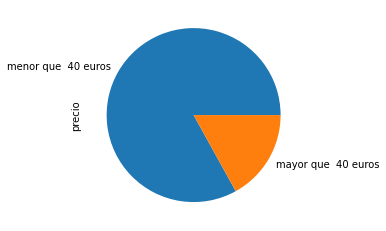

In [6]:
# Comprobar si las etiquetas están desvalanceadas
balance_clases = dataset['precio'].value_counts()
print(balance_clases)

# Gráfico del balance de clases
balance_clases.plot.pie()

**5. Resumen estadístico del conjunto de datos de entrada:** La estadística descriptiva recolecta y analiza el conjunto de datos de entrada con el objetivo de describir las características y comportamientos de este conjunto mediante las siguientes medidas resumen: número total de observaciones (count), media (mean), desviación estándar (std), valor mínimo (min), valor máximo (max) y los valores de los diferentes cuartiles (25%, 50%, 75%).

In [7]:
# Datos estadísticos de cada uno de los atributos
dataset.describe()

,hora,dia,mes,hidraul,eolica,demanda,ciclocomb,cogener,nuclear,carbon,biomas,precio-elect-dia-anterior,MIBGAS-dia-anterior
count,4223.000000,4223.000000,4223.000000,4223.000000,4223.000000,4220.000000,4223.000000,4223.000000,4223.000000,4220.000000,4223.000000,4223.000000,4223.000000
mean,11.502250,15.411556,3.443287,3090.683495,6142.901373,20223.538578,2337.097135,3059.788942,6019.210466,674.060308,374.144684,28.813694,8.288518
std,6.922282,8.598094,1.674775,1398.795645,3488.275912,3945.242127,1488.503359,282.994453,1212.068728,444.206117,102.061931,10.929161,2.347374
min,0.000000,1.000000,1.000000,856.600000,614.400000,0.000000,460.000000,1825.500000,3410.200000,0.000000,197.000000,1.020000,4.170000
25%,6.000000,8.000000,2.000000,1924.150000,3447.650000,17123.000000,1255.600000,2909.150000,4886.200000,413.000000,287.000000,21.080000,6.040000
50%,12.000000,15.000000,3.000000,2760.400000,5394.900000,20094.500000,1962.600000,3089.300000,6730.500000,530.000000,373.000000,28.410000,8.180000
75%,17.500000,23.000000,5.000000,4126.450000,8229.350000,22871.725000,2893.350000,3238.150000,7089.500000,973.000000,462.000000,36.670000,9.975000
max,23.000000,31.000000,6.000000,7411.900000,18996.300000,35458.900000,9078.400000,3696.800000,7100.500000,2065.000000,551.000000,62.480000,14.480000


## **3. Visualizar los datos**

Una manera visual de entender los datos de entrada. 
1. Histograma
2. Curva de densidad
3. Boxplots
4. Matriz de correlación


**1. Histograma**

Respresentación gráfica de cada uno de los atributos en forma de barras, donde la superficie de la barra es proporcional a la frecuencia de los valores representados.

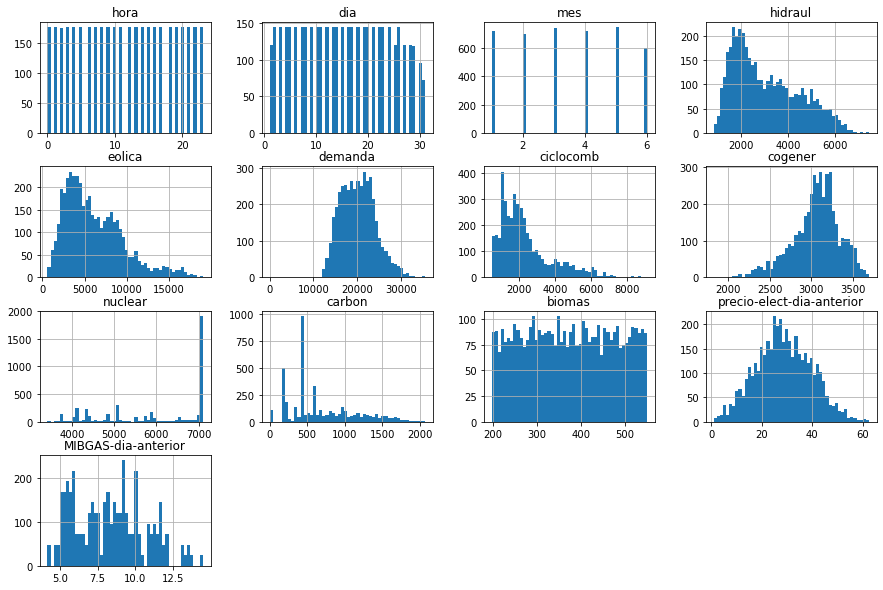

In [8]:
histograma = dataset.hist(xlabelsize=10, ylabelsize=10, bins=50, figsize=(15, 10))

**2. Gráfico de densidades**

Visualiza la distribución de los datos. Es una variable del histograma, pero elimina el ruido, por lo que son mejores para determinar la forma de distribución de un atributo. Lo spicos del gráfico de densidad ayudan a mostrar dónde los valores se concentran más. 

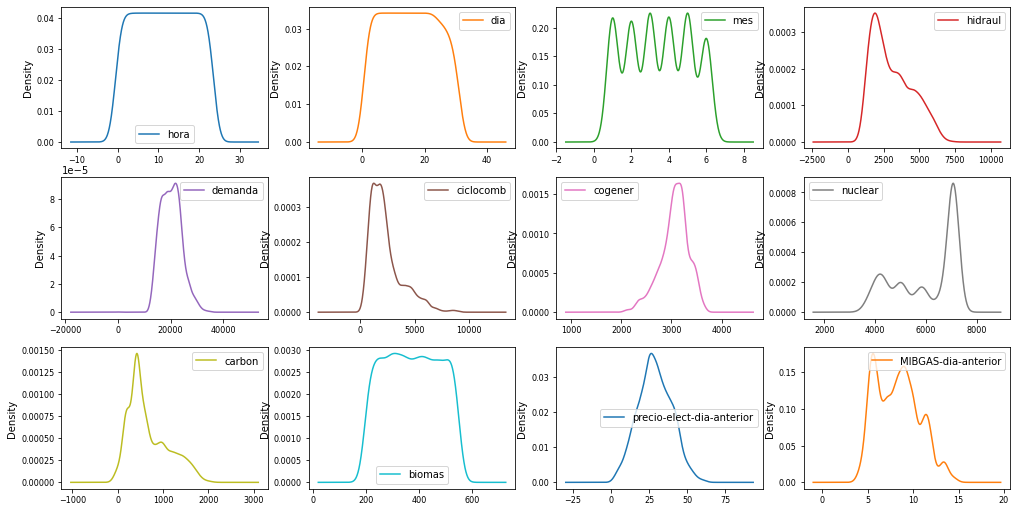

In [9]:
density = dataset.plot(kind='kde', x=4, subplots=True, legend=True, layout=(4, 4), figsize=(17, 12), sharex=False,
                        fontsize=8, stacked=True) 

**3. Boxplots** 

El boxplot (diagrama de caja) nos permite identificar los valores atípicos y comparar distribuciones. Además, se conoce como se distribuyen el 50% de los valores (dentro de la caja).

* **¿Que atributo llama la atención por sus valores atípicos?**. 

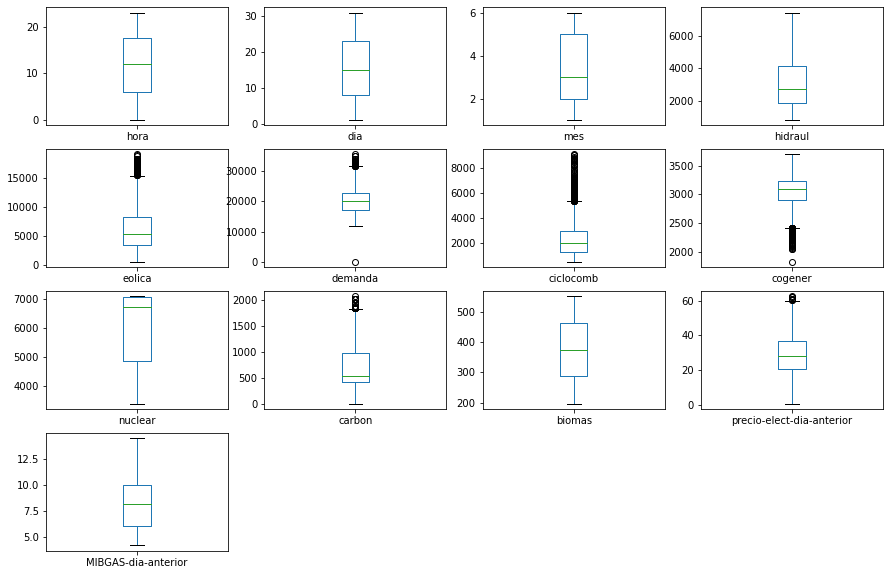

In [10]:
atributos_boxplot = dataset.plot(kind='box', subplots=True, layout=(4, 4), figsize=(15, 10), sharex=False,
                                 sharey=False, fontsize=10)

**4. Matriz de correlación** 
Utilizamos el método de Spearman para evaluar la relación monótona entre dos variables contínuas. 

Comparación entre método de [Pearson y Spearman]

[Pearson y Spearman]: https://support.minitab.com/es-mx/minitab/18/help-and-how-to/statistics/basic-statistics/supporting-topics/correlation-and-covariance/a-comparison-of-the-pearson-and-spearman-correlation-methods/


* **¿Qué variable no tiene ninguna correlación con ningún atributo?** 

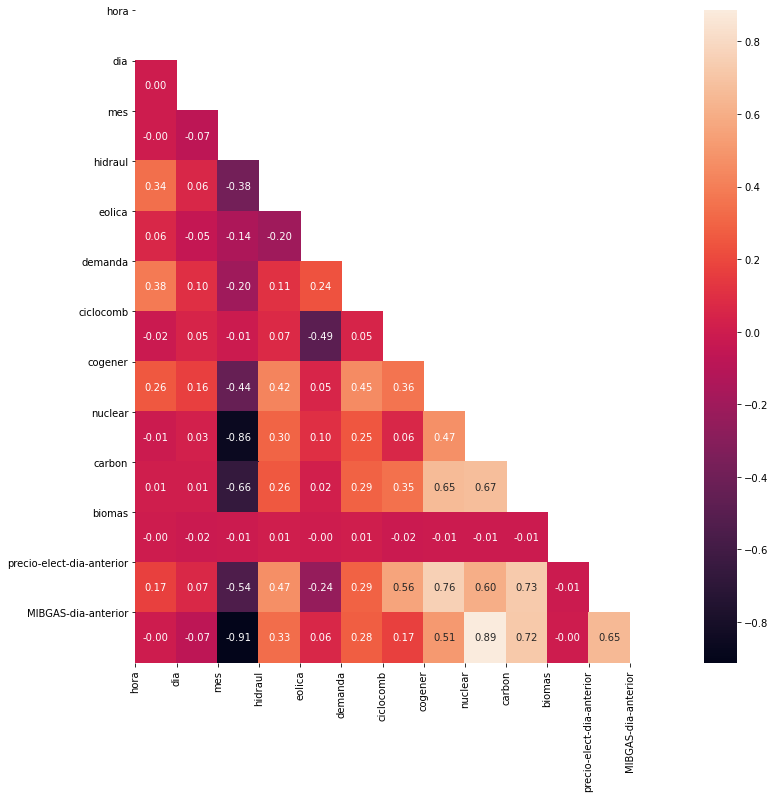

In [11]:
# Otra librería de visualización de datos
import seaborn as sns

# Cálculo de coeficientes de correlación
corr_matrix = dataset.corr(method='spearman') 


# Quitar valores repetidos
mask = np.zeros_like(corr_matrix, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

  
f, ax = plt.subplots(figsize=(12, 12))
#Generar Heat Map,
sns.heatmap(corr_matrix, annot=True, fmt=".2f" , mask=mask,)
    # xticks
plt.xticks(range(len(corr_matrix.columns)), corr_matrix.columns);
    # yticks
plt.yticks(range(len(corr_matrix.columns)), corr_matrix.columns)
    # plot
plt.show()

No podemos ver la correlación con el precio, debemos pasarlo a numérico *LabelEncoder*

In [12]:
from sklearn.preprocessing import LabelEncoder

lab_encoder = LabelEncoder() 
lab_encoder.fit(dataset['precio'])  
print(lab_encoder.classes_)  # Muestra las clases diferentes que hay

dataset['precio'] = lab_encoder.transform(dataset['precio'])
print(dataset)

['mayor que  40 euros' 'menor que  40 euros']
      hora  dia  mes  hidraul  eolica  demanda  ciclocomb  cogener  nuclear  \
0        0    2    1   5221.1  1639.0  13290.5     2500.5   2493.8   7093.6   
1        1    2    1   4928.5  1568.4  12720.1     2411.5   2447.8   7091.6   
2        2    2    1   4860.3  1566.3  12558.6     2307.5   2446.6   7092.6   
3        3    2    1   4980.8  1781.5  12837.5     2307.5   2436.7   7092.6   
4        4    2    1   4984.3  1998.2  13100.9     2374.2   2448.3   7094.6   
...    ...  ...  ...      ...     ...      ...        ...      ...      ...   
4218    19   26    6   4230.5  3680.1  29267.6     7090.4   3200.0   5061.4   
4219    20   26    6   4479.3  3828.2  29025.5     7130.7   3203.2   5063.4   
4220    21   26    6   3800.5  3712.7  29266.4     6764.1   3217.7   5062.4   
4221    22   26    6   3529.7  3780.1  28711.2     6745.1   3215.0   5064.4   
4222    23   26    6   2650.6  3676.9  26581.4     6650.9   3209.0   5065.4   

     

In [13]:
# replace column values 0: menor que 40; 1: mayor que 40. 

dataset['precio'] = dataset['precio'].map({0:1, 1:0})
dataset.to_excel('dataset.xlsx')


In [14]:
dataset

,hora,dia,mes,hidraul,eolica,demanda,ciclocomb,cogener,nuclear,carbon,biomas,precio-elect-dia-anterior,MIBGAS-dia-anterior,precio
0,0,2,1,5221.1,1639.0,13290.5,2500.5,2493.8,7093.6,430.0,270,41.88,11.27,0
1,1,2,1,4928.5,1568.4,12720.1,2411.5,2447.8,7091.6,430.0,243,38.60,11.27,0
2,2,2,1,4860.3,1566.3,12558.6,2307.5,2446.6,7092.6,417.0,362,36.55,11.27,0
3,3,2,1,4980.8,1781.5,12837.5,2307.5,2436.7,7092.6,387.0,369,32.32,11.27,0
4,4,2,1,4984.3,1998.2,13100.9,2374.2,2448.3,7094.6,387.0,413,30.85,11.27,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4218,19,26,6,4230.5,3680.1,29267.6,7090.4,3200.0,5061.4,946.0,365,40.44,7.28,0
4219,20,26,6,4479.3,3828.2,29025.5,7130.7,3203.2,5063.4,946.0,453,41.23,7.28,1
4220,21,26,6,3800.5,3712.7,29266.4,6764.1,3217.7,5062.4,946.0,362,40.24,7.28,0
4221,22,26,6,3529.7,3780.1,28711.2,6745.1,3215.0,5064.4,946.0,424,40.10,7.28,1


#### Volvemos a mostrar la matriz de correlación con el valor del precio [1 (muy alto), 0 (normal)]


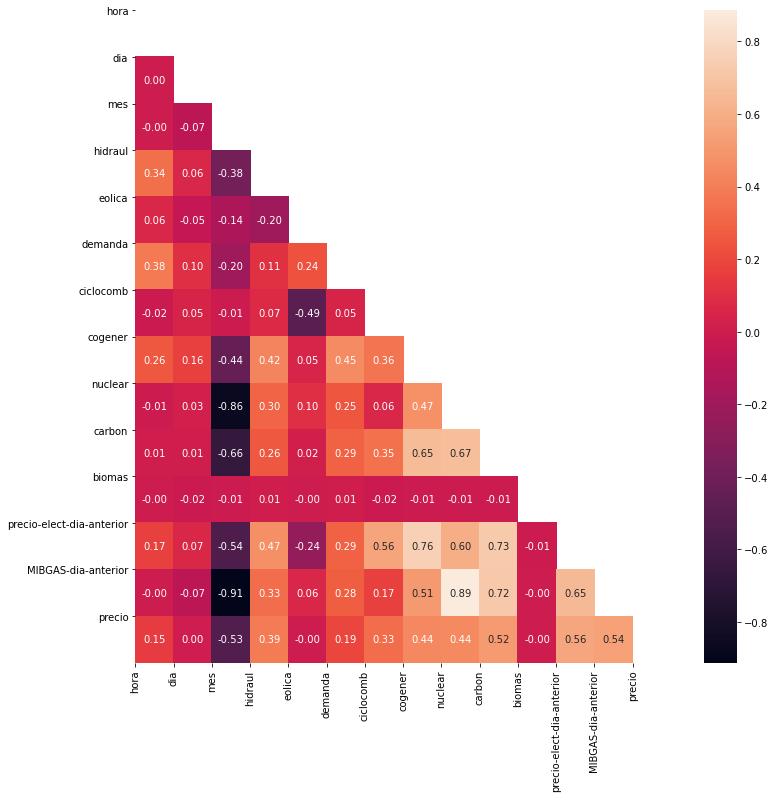

In [15]:
# Cálculo de coeficientes de correlación
corr_matrix = dataset.corr(method='spearman') 


# Quitar valores repetidos
mask = np.zeros_like(corr_matrix, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

  
f, ax = plt.subplots(figsize=(12, 12))
#Generar Heat Map,
sns.heatmap(corr_matrix, annot=True, fmt=".2f" , mask=mask,)
    # xticks
plt.xticks(range(len(corr_matrix.columns)), corr_matrix.columns);
    # yticks
plt.yticks(range(len(corr_matrix.columns)), corr_matrix.columns)
    # plot
plt.show()

## *4. Preparar los datos*

1. Missing data
2. Data cleaning (eliminar outliers).
3. LabelEncoding (ya lo hemos hecho)
4. Feature engineering
5. Transformación.

Primero, divido los datos en **atributos**: X (features) y **etiquetas**: y (target)

In [16]:
# Atributos X (features); etiquetas y (target)
X = dataset.drop(['precio'], axis=1) 
y = dataset['precio']
X

,hora,dia,mes,hidraul,eolica,demanda,ciclocomb,cogener,nuclear,carbon,biomas,precio-elect-dia-anterior,MIBGAS-dia-anterior
0,0,2,1,5221.1,1639.0,13290.5,2500.5,2493.8,7093.6,430.0,270,41.88,11.27
1,1,2,1,4928.5,1568.4,12720.1,2411.5,2447.8,7091.6,430.0,243,38.60,11.27
2,2,2,1,4860.3,1566.3,12558.6,2307.5,2446.6,7092.6,417.0,362,36.55,11.27
3,3,2,1,4980.8,1781.5,12837.5,2307.5,2436.7,7092.6,387.0,369,32.32,11.27
4,4,2,1,4984.3,1998.2,13100.9,2374.2,2448.3,7094.6,387.0,413,30.85,11.27
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4218,19,26,6,4230.5,3680.1,29267.6,7090.4,3200.0,5061.4,946.0,365,40.44,7.28
4219,20,26,6,4479.3,3828.2,29025.5,7130.7,3203.2,5063.4,946.0,453,41.23,7.28
4220,21,26,6,3800.5,3712.7,29266.4,6764.1,3217.7,5062.4,946.0,362,40.24,7.28
4221,22,26,6,3529.7,3780.1,28711.2,6745.1,3215.0,5064.4,946.0,424,40.10,7.28


**Missing data**

Comprobar si exisiten Nan en los datos de entrada. 

- Se utiliza el método [fillna] de Pandas.

- Más información acerca de cómo imputar valores con [Scikit Learn]

[Scikit Learn]: https://scikit-learn.org/stable/modules/impute.html
[fillna]: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.fillna.html





In [17]:
# Comprobar si faltan datos en los atributos
X.isna().sum()

hora                         0
dia                          0
mes                          0
hidraul                      0
eolica                       0
demanda                      3
ciclocomb                    0
cogener                      0
nuclear                      0
carbon                       3
biomas                       0
precio-elect-dia-anterior    0
MIBGAS-dia-anterior          0
dtype: int64

In [18]:
# Relleno los missing values de cada atributo con el valor anterior del atributo. 
X["demanda"].fillna(method='ffill', inplace=True)
X["carbon"].fillna(method='bfill', inplace=True)

In [19]:
# Comprobar si faltan datos en el target
y.isna().sum()

0

In [20]:
# Comprueba que no falta ningún valor
X.isna().sum()

hora                         0
dia                          0
mes                          0
hidraul                      0
eolica                       0
demanda                      0
ciclocomb                    0
cogener                      0
nuclear                      0
carbon                       0
biomas                       0
precio-elect-dia-anterior    0
MIBGAS-dia-anterior          0
dtype: int64

**3. Feature engineering**

Utilizando la matriz de correlación, eliminar los atributos con una correlacion cercana a 0 con la etiqueta **"precio"**. 

* **¿Qué atributo(s) se elimana(n)?** 

In [21]:
# Elimino el atributo
X.drop(['biomas', 'dia', 'eolica', 'mes'], axis='columns', inplace=True)
X

,hora,hidraul,demanda,ciclocomb,cogener,nuclear,carbon,precio-elect-dia-anterior,MIBGAS-dia-anterior
0,0,5221.1,13290.5,2500.5,2493.8,7093.6,430.0,41.88,11.27
1,1,4928.5,12720.1,2411.5,2447.8,7091.6,430.0,38.60,11.27
2,2,4860.3,12558.6,2307.5,2446.6,7092.6,417.0,36.55,11.27
3,3,4980.8,12837.5,2307.5,2436.7,7092.6,387.0,32.32,11.27
4,4,4984.3,13100.9,2374.2,2448.3,7094.6,387.0,30.85,11.27
...,...,...,...,...,...,...,...,...,...
4218,19,4230.5,29267.6,7090.4,3200.0,5061.4,946.0,40.44,7.28
4219,20,4479.3,29025.5,7130.7,3203.2,5063.4,946.0,41.23,7.28
4220,21,3800.5,29266.4,6764.1,3217.7,5062.4,946.0,40.24,7.28
4221,22,3529.7,28711.2,6745.1,3215.0,5064.4,946.0,40.10,7.28


**4. Transformación (escalado)**. 

* **Escalar los datos utilizando el método de *MinMaxScaler()* dentro del rango [0,1].**

In [22]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_scaled = X.copy()
X_scaled = pd.DataFrame(scaler.fit_transform(df_scaled))
X_scaled.columns = df_scaled.columns
X_scaled.head()

,hora,hidraul,demanda,ciclocomb,cogener,nuclear,carbon,precio-elect-dia-anterior,MIBGAS-dia-anterior
0,0.000000,0.665797,0.374814,0.236761,0.357131,0.998130,0.208232,0.664823,0.688652
1,0.043478,0.621162,0.358728,0.226434,0.332550,0.997588,0.208232,0.611455,0.688652
2,0.086957,0.610758,0.354173,0.214367,0.331908,0.997859,0.201937,0.578100,0.688652
3,0.130435,0.629140,0.362039,0.214367,0.326618,0.997859,0.187409,0.509274,0.688652
4,0.173913,0.629674,0.369467,0.222106,0.332817,0.998401,0.187409,0.485356,0.688652


## *5. Dividir los datos*
 

In [23]:
from sklearn.model_selection import train_test_split

test_size = 0.2  # porcentaje de los datos de entrada que utilizaré para validar el modelo

# Divido los datos en datos de entreno, validación y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=0,
                                                    shuffle=True)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=test_size, random_state=0,
                                                    shuffle=True)

## *6. Construcción y evaluación de modelos*

* Seleccionamos **[balanced_accuracy]** como métrica de evaluación. 
* Métricas de evaluación disponibles en [Scikit-Learn].


[Scikit-Learn]: https://scikit-learn.org/stable/modules/model_evaluation.html

[balanced_accuracy]: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.balanced_accuracy_score.html

* Recordar utilizar siempre el mismo random_state para poder comparar resultados. 

In [1]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
import xgboost as xgb

num_folds = 15
error_metrics = {'balanced_accuracy', 'f1_weighted'}
models = { ('LR', LogisticRegression(solver='saga')), 
          ('LR-weight', LogisticRegression(solver='saga')),
          ('KNN', KNeighborsClassifier()),
           ('RF-weight', RandomForestClassifier(class_weight={0:1,1:4})),
           ('RF', RandomForestClassifier()), 
           ('XGB', xgb.XGBClassifier(sample_weight=sample_weights_data))
         }

results = [] # guarda los resultados de las métricas de evaluación
names = []  # Nombre de cada algoritmo
msg = []  # imprime el resumen del método de cross-validation


NameError: name 'sample_weights_data' is not defined

* **¿Cuál obtiene mejores resultados?** 
* **¿Qué balanced_accuracy obtiene?** 

Métrica de evaluación:  f1_weighted
Modelo  LR


C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached 

Modelo  KNN
Modelo  RF
Modelo  RF-weight
Modelo  LR-weight


C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached 

Modelo  XGB
[22:29:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:29:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Usuario\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[22:29:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:29:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:29:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:29:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

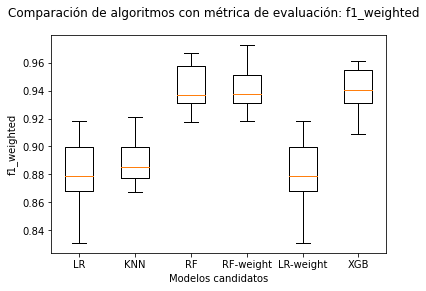

Métrica de evaluación:  balanced_accuracy
Modelo  LR


C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached 

Modelo  KNN
Modelo  RF
Modelo  RF-weight
Modelo  LR-weight


C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached 

Modelo  XGB
[22:29:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:29:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:29:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:29:18] WARNING: C:/Users/Administrator/workspace/xgboo

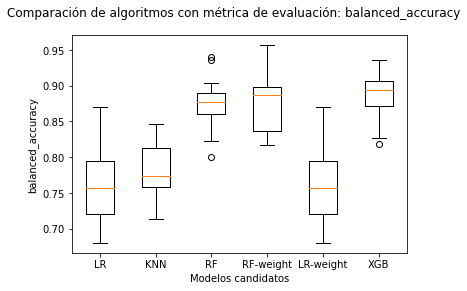

In [25]:
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.model_selection import StratifiedKFold

# Entreno con validación cruzada
for scoring in error_metrics:
    print('Métrica de evaluación: ', scoring)
    for name, model in models:
        print('Modelo ', name)
        cross_validation = StratifiedKFold(n_splits=num_folds, random_state=0, shuffle=True)
        cv_results = cross_val_score(model, X_train, y_train, cv=cross_validation, scoring=scoring)
        results.append(cv_results)
        names.append(name)
        resume = (name, cv_results.mean(), cv_results.std())
        msg.append(resume)
    print(msg)

    # Comparar resultados entre algoritmos
    fig = plt.figure()
    fig.suptitle('Comparación de algoritmos con métrica de evaluación: %s' %scoring)
    ax = fig.add_subplot(111)
    ax.set_xlabel('Modelos candidatos')
    ax.set_ylabel('%s' %scoring)
    plt.boxplot(results)
    ax.set_xticklabels(names)
    plt.show()

    results = []


## *7. Ajustar hiperparámetros*

Pasos para realizar el hiperajuste de los parámetros:
[XGBClassifier] parámeteros

* Métrica para optimizar: *balanced_accuracy*
* Definir los rangos de los parámetros de búsqueda: *params*
* Entrenar con los datos de validación: *X_val*

[XGBClassifier]:https://xgboost.readthedocs.io/en/latest/parameter.html

In [26]:

from sklearn.model_selection import StratifiedKFold

# XGBOOST
modelo = xgb.XGBClassifier()
params = {
     'booster': ['gbtree', 'dart'], #default=gbtree
     'eta': [0.1, 0.3], #default=0.3
     # 'max_depth': [3, 6, 8],  #default=6
     #'predictor': ['auto', 'gpu_predictor'] # default auto
 }
scoring='balanced_accuracy'
cross_validation = StratifiedKFold(n_splits=10)
my_cv = cross_validation.split(X_val, y_val)
gsearch = GridSearchCV(estimator=modelo, param_grid=params, scoring=scoring, cv=my_cv, verbose=2)
gsearch.fit(X_val, y_val)

print("Mejor resultado: %f utilizando los siguientes hiperparámetros %s" % (gsearch.best_score_, gsearch.best_params_))
means = gsearch.cv_results_['mean_test_score']
stds = gsearch.cv_results_['std_test_score']
params = gsearch.cv_results_['params']
# for mean, stdev, param in zip(means, stds, params):
#     print("%f (%f) with: %r" % (mean, stdev, param))

Fitting 10 folds for each of 8 candidates, totalling 80 fits
[CV] booster=gbtree, eta=0.1, lambda=1 ...............................
[22:30:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] ................ booster=gbtree, eta=0.1, lambda=1, total=   0.1s
[CV] booster=gbtree, eta=0.1, lambda=1 ...............................
[22:30:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] ................ booster=gbtree, eta=0.1, lambda=1, total=   0.1s
[CV] booster=gbtree, eta=0.1, lambd

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\Usuario\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Usuario\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] ................ booster=gbtree, eta=0.1, lambda=1, total=   0.1s
[CV] booster=gbtree, eta=0.1, lambda=1 ...............................
[22:30:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] ................ booster=gbtree, eta=0.1, lambda=1, total=   0.1s
[CV] booster=gbtree, eta=0.1, lambda=1 ...............................
[22:30:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] ................ booster=gbtree, eta=0.1, lambda=1, total=   0.1s
[CV] booster=gbtree, eta=

[CV] ................ booster=gbtree, eta=0.3, lambda=1, total=   0.0s
[CV] booster=gbtree, eta=0.3, lambda=1 ...............................
[22:30:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] ................ booster=gbtree, eta=0.3, lambda=1, total=   0.0s
[CV] booster=gbtree, eta=0.3, lambda=1 ...............................
[22:30:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] ................ booster=gbtree, eta=0.3, lambda=1, total=   0.0s
[CV] booster=gbtree, eta=

[CV] .................. booster=dart, eta=0.1, lambda=1, total=   0.3s
[CV] booster=dart, eta=0.1, lambda=1 .................................
[22:30:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] .................. booster=dart, eta=0.1, lambda=1, total=   0.3s
[CV] booster=dart, eta=0.1, lambda=1 .................................
[22:30:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] .................. booster=dart, eta=0.1, lambda=1, total=   0.3s
[CV] booster=dart, eta=0.

[CV] .................. booster=dart, eta=0.3, lambda=1, total=   0.3s
[CV] booster=dart, eta=0.3, lambda=1 .................................
[22:30:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] .................. booster=dart, eta=0.3, lambda=1, total=   0.3s
[CV] booster=dart, eta=0.3, lambda=1 .................................
[22:30:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] .................. booster=dart, eta=0.3, lambda=1, total=   0.3s
[CV] booster=dart, eta=0.

[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:   14.0s finished


## *8. Evaluación final del modelo*



Métricas de evaluación:
  * 1. Matriz de confusión
  * 2. Coeficiente de Matthews (MCC)

    
**Entrena el modelo con los hiperparámetros óptimos encontrados en el apartado anterior y realiza las predicciones.** 

In [28]:

# modelo_final = RandomForestClassifier(max_features='sqrt', min_samples_split=5,  n_estimators=400, class_weight={0:1,1:5})
modelo_final = xgb.XGBClassifier(booster='gbtree', eta=0.3)
modelo_final.fit(X_train,y_train)  # Se entrena al modelo RF
y_predict = modelo_final.predict(X_test)  # Se calculan las predicciones



[22:31:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


**¿Qué atributos tienen más peso en el modelo?** 

Para el caso del Random Forest, el atributo más importante para predecir los precios es la generación de carbón, seguido de la generación hidráulica y del mes del año. En la matriz de correlación, el atributo carbón era el que tenía más correlación con la variable clase. 

In [29]:
# Imprimir la importancia de cada atributo (Solo si Random forest es seleccionado)
importancia_atributos = gsearch.best_estimator_.feature_importances_

std = np.std([tree.feature_importances_ for tree in gsearch.best_estimator_.estimators_],axis=0)
indices = np.argsort(importancia_atributos)[::-1]

# Print the feature ranking
print("Ranking de importancia de atributos:")
for f in range(X_scaled.shape[1]):
    print("%d. Atributo %d (%f)" % (f + 1, indices[f], importancia_atributos[indices[f]]))


AttributeError: 'XGBClassifier' object has no attribute 'estimators_'

**1. Matriz de confusión**

In [30]:
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix

confusion_matrix = confusion_matrix(y_test, y_predict)
print(classification_report(y_test, y_predict))
print(confusion_matrix)

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       693
           1       0.86      0.86      0.86       152

    accuracy                           0.95       845
   macro avg       0.92      0.92      0.92       845
weighted avg       0.95      0.95      0.95       845

[[672  21]
 [ 21 131]]


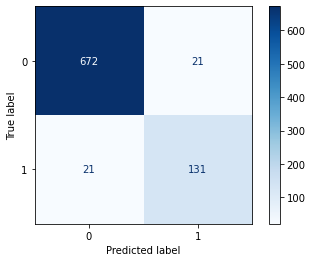

In [31]:
# Gráfico no normalizado de la martiz de confusión

disp = plot_confusion_matrix(modelo_final, X_test, y_test,
                                 cmap=plt.cm.Blues, values_format = '')

**2. Coeficiente de Matthews (MCC)**

El MCC utiliza coeficientes de correlación entre -1 y +1. 
* Coeficiente +1 representa una predicción perfecta
* Coeficiente 0 representa una predicción media aleatoria
* Coeficiente -1 representa una predicción inversa. 

In [32]:
from sklearn.metrics import matthews_corrcoef

matthews_corrcoef(y_test, y_predict)

0.8315390749601276